In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
import json

In [2]:
with open('./sample.json') as f:
  d = json.load(f)

In [3]:
d["deviceData"]

{'total_channels': 8,
 'data_rate': 0,
 'clock': 'internal',
 'reference': 'internal',
 'bias_enabled': True,
 'test_passed': True}

In [5]:
time_series = []
eeg_data = []
for item in d["eegData"]:
    time_series.append(item["time"])
    eeg_data.append(item["val"])

In [6]:
df = pd.DataFrame(eeg_data, columns=[1, 2, 3, 4, 5, 6, 7], index=time_series)

In [42]:
df.head(60)

,1,2,3,4,5,6,7
"Tue, 14 Jul 2020 16:59:58 GMT",0.013317,0.013315,0.013334,0.013325,0.013315,0.013324,0.013323
"Tue, 14 Jul 2020 16:59:58 GMT",0.014244,0.014239,0.014258,0.014249,0.014238,0.014248,0.014246
"Tue, 14 Jul 2020 16:59:58 GMT",0.004727,0.004722,0.004728,0.004724,0.004720,0.004725,0.004715
"Tue, 14 Jul 2020 16:59:59 GMT",-0.005387,-0.005386,-0.005395,-0.005392,-0.005389,-0.005388,-0.005404
"Tue, 14 Jul 2020 16:59:59 GMT",0.011041,0.011041,0.011056,0.011050,0.011041,0.011049,0.011046
"Tue, 14 Jul 2020 16:59:59 GMT",0.014926,0.014921,0.014942,0.014932,0.014921,0.014930,0.014929
"Tue, 14 Jul 2020 16:59:59 GMT",-0.004808,-0.004809,-0.004817,-0.004815,-0.004812,-0.004811,-0.004827
"Tue, 14 Jul 2020 16:59:59 GMT",0.012680,0.012675,0.012692,0.012684,0.012674,0.012682,0.012679
"Tue, 14 Jul 2020 16:59:59 GMT",0.014484,0.014479,0.014498,0.014489,0.014478,0.014487,0.014486
"Tue, 14 Jul 2020 16:59:59 GMT",0.007605,0.007606,0.007617,0.007612,0.007606,0.007613,0.007608


In [74]:
s_df = df.rolling(window = 7).mean()

In [75]:
s_df.head(60)

,1,2,3,4,5,6,7
"Tue, 14 Jul 2020 16:59:58 GMT",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Tue, 14 Jul 2020 16:59:58 GMT",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Tue, 14 Jul 2020 16:59:58 GMT",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Tue, 14 Jul 2020 16:59:59 GMT",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Tue, 14 Jul 2020 16:59:59 GMT",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Tue, 14 Jul 2020 16:59:59 GMT",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Tue, 14 Jul 2020 16:59:59 GMT",0.006866,0.006863,0.006872,0.006868,0.006862,0.006868,0.006861
"Tue, 14 Jul 2020 16:59:59 GMT",0.006775,0.006772,0.006781,0.006776,0.006770,0.006776,0.006769
"Tue, 14 Jul 2020 16:59:59 GMT",0.006809,0.006806,0.006815,0.006810,0.006805,0.006811,0.006803
"Tue, 14 Jul 2020 16:59:59 GMT",0.007220,0.007218,0.007228,0.007223,0.007217,0.007223,0.007217


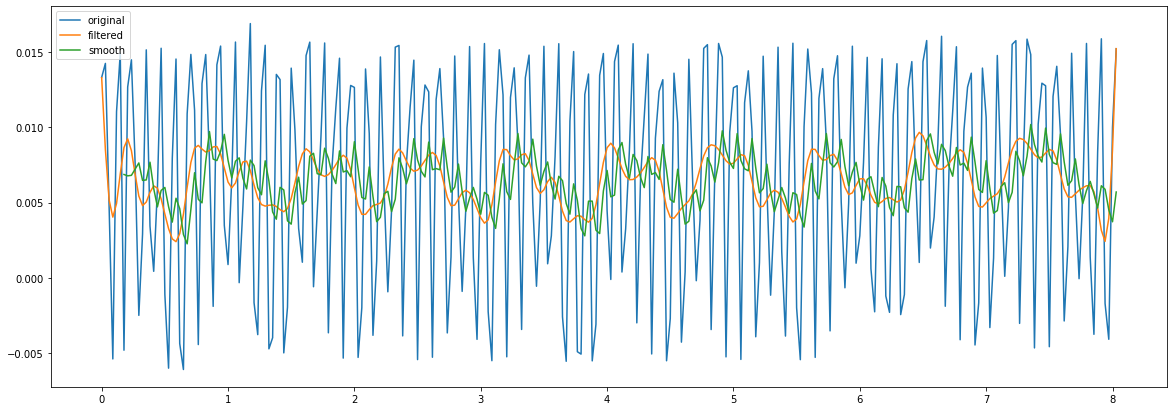

<Figure size 1440x504 with 0 Axes>

In [53]:
# Plot original
plt.plot(t, df[1], label="original")
# Plot original with low pass filter applied
fs = 34  # Sampling frequency
# Generate the time vector properly
t = np.arange(274) / fs

fc = 5  # Cut-off frequency of the filter
w = fc / (fs / 2) # Normalize the frequency
b, a = signal.butter(5, w, 'low')
output = signal.filtfilt(b, a, df[1])
plt.plot(t, output, label='filtered')

smooth_data = df[1].rolling(window=7).mean()
plt.plot(t, smooth_data, label="smooth")

plt.legend()
plt.figure(figsize=(20,7))
plt.show()